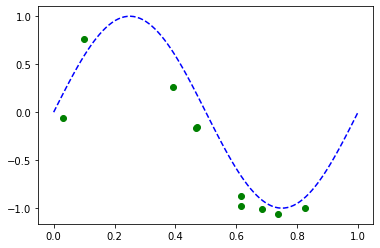

In [1]:
from BayesianPlotUtensil import *
import numpy as np
import matplotlib.pyplot as plt


N = 10
X = np.random.rand(N,1)

sigma, tau = 0.2, 0.707

def curve_func(x, sigma):
    y = np.sin(2 * np.pi * x) + np.random.normal(scale=sigma, size=x.shape)
    return y

x_line = np.linspace(0, 1, 100).reshape(-1, 1)
y_curve = curve_func(x_line, 0)
y_noise = curve_func(X, sigma)
# print(x_line.shape)
plt.plot(x_line, y_curve, 'b--')
plt.scatter(X, y_noise, color='green')

In [2]:
# gaussian basis

def gaussian_basis(x, mu, std):
    return np.exp(-0.5 * (x-mu)**2/std**2)

X_gb = np.zeros(X.shape)
x_line_gb = np.zeros(x_line.shape)

num_gaussianbasis = 10

for mu in np.linspace(0, 1, num_gaussianbasis):
    X_gb = np.c_[X_gb, gaussian_basis(X, mu, 0.1)]
    x_line_gb = np.c_[x_line_gb, gaussian_basis(x_line, mu, 0.1)]

In [3]:
from BayesianLR import BayesianLinearRegression
print(X_gb.shape, x_line_gb.shape)
BLR = BayesianLinearRegression(X_gb, y_noise, sigma, tau)
theta_mu, theta_cov = BLR.Posterior()
y_mu, y_var = BLR.predict(x_line_gb)

(10, 11) (100, 11)


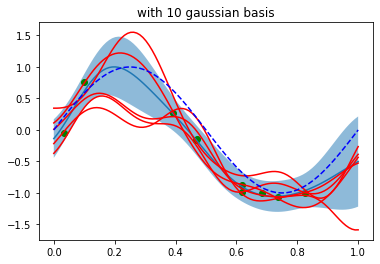

In [4]:
# plot fitting, and confidence
PlotBayesianConfidenceRegion(x_line, y_mu, np.sqrt(y_var))
PlotPosteriorFitting(x_line_gb, theta_mu, theta_cov, 5, x_line)

# plot origin data
plt.title(f'with {num_gaussianbasis} gaussian basis')
plt.plot(x_line, y_curve, 'b--')
plt.scatter(X, y_noise, color='green')

In [7]:
score = BLR.Log_Marginal_Likelihood()
print(score)

-3.8943632006502353


In [6]:
a=np.random.rand(100)
c=np.c_[a, np.ones(a.shape[0])]
c.shape

(100, 2)